In [1]:
import parseTrackletXML as xmlParser

kittiDir = '/home/carnd/udacity_workspace/kitti2bag/raw_data_downloader/2011_09_26'
drive = '2011_09_26_drive_0001_sync'
tracklets = xmlParser.example(kittiDir, drive)

parsing tracklet file /home/carnd/udacity_workspace/kitti2bag/raw_data_downloader/2011_09_26/2011_09_26_drive_0001_sync/tracklet_labels.xml
file contains 15 tracklets
loaded 15 tracklets
tracklet   0: [Tracklet over 14 frames for Car]
tracklet   1: [Tracklet over 21 frames for Car]
tracklet   2: [Tracklet over 27 frames for Car]
tracklet   3: [Tracklet over 108 frames for Tram]
tracklet   4: [Tracklet over 34 frames for Car]
tracklet   5: [Tracklet over 29 frames for Car]
tracklet   6: [Tracklet over 32 frames for Car]
tracklet   7: [Tracklet over 37 frames for Car]
tracklet   8: [Tracklet over 36 frames for Car]
tracklet   9: [Tracklet over 47 frames for Car]
tracklet  10: [Tracklet over 75 frames for Cyclist]
tracklet  11: [Tracklet over 37 frames for Cyclist]
tracklet  12: [Tracklet over 23 frames for Car]
tracklet  13: [Tracklet over 37 frames for Car]
tracklet  14: [Tracklet over 15 frames for Car]


In [2]:
for iTracklet, tracklet in enumerate(tracklets):
    print ('tracklet {0: 3d}: {1}'.format(iTracklet, tracklet) )
   
    for translation, rotation, state, occlusion, truncation, amtOcclusion, amtBorders, absoluteFrameNumber in tracklet:
        # print (absoluteFrameNumber)        
        # end: for all frames
        pass
    #end: for all tracklets
    
# create a data frame that including all the tracelet


tracklet   0: [Tracklet over 14 frames for Car]
tracklet   1: [Tracklet over 21 frames for Car]
tracklet   2: [Tracklet over 27 frames for Car]
tracklet   3: [Tracklet over 108 frames for Tram]
tracklet   4: [Tracklet over 34 frames for Car]
tracklet   5: [Tracklet over 29 frames for Car]
tracklet   6: [Tracklet over 32 frames for Car]
tracklet   7: [Tracklet over 37 frames for Car]
tracklet   8: [Tracklet over 36 frames for Car]
tracklet   9: [Tracklet over 47 frames for Car]
tracklet  10: [Tracklet over 75 frames for Cyclist]
tracklet  11: [Tracklet over 37 frames for Cyclist]
tracklet  12: [Tracklet over 23 frames for Car]
tracklet  13: [Tracklet over 37 frames for Car]
tracklet  14: [Tracklet over 15 frames for Car]


In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame( columns = ['frame_nr','object','tx', 'ty', 'tz','rz','height','width','length'])

for iTracklet, tracklet in enumerate(tracklets):
    # print ('tracklet {0: 3d}: {1}'.format(iTracklet, tracklet) )
   
    for translation, rotation, state, occlusion, truncation, amtOcclusion, amtBorders, absoluteFrameNumber in tracklet:
        # print (absoluteFrameNumber)        
        # end: for all frames
        df.loc[len(df)]=[int(absoluteFrameNumber),tracklet.objectType, translation[0] , translation[1], translation[2], rotation[2], tracklet.size[0], tracklet.size[1],tracklet.size[2]] 
    #end: for all tracklets

# change type of frame 
df['frame_nr'] = df['frame_nr'].astype(int)


In [4]:
number_of_frame = np.amax(df.frame_nr)
print (number_of_frame)

107


In [ ]:
import cv2

number_of_frame = np.amax(df.frame_nr)
layer_nr = 2
prefix = '2011_09_26_drive_0001' 


for i in range(number_of_frame):
    df_frame_car = df[ ( (df.frame_nr == i) & (df.object == 'Car')) ]
    # create training label
    
    # draw bounding box on the image 
    name = './'+ 'rosws/train_data/'+ prefix + '_'+  str(i) + '_'+ str(layer_nr) + '.png'
    vis_name = './'+ 'rosws/train_data/'+ prefix + '_'+  str(i) + '_bb'+'.png'

    image = cv2.imread(name)
        
    # iterate data frame
    for index, row in df_frame_car.iterrows():
        # print (row.frame_nr, row.object)
        ( fl , fr, rr, rl) = compute_bb_pixel_coordinate( row.tx, row.ty, row.rz, row.width, row.length) 
        vetexes = np.array([fl , fr, rr, rl ],np.int32)
        cv2.polylines(image, np.int32([vetexes]), True, (0,255,0), 2)
        #cv2.rectangle(image, fl ,rr,(0,255,0),2)
    
    # save image
    print (vis_name)
    cv2.imwrite(vis_name, image)


In [5]:
df[ ( (df.frame_nr == 0) & (df.object == 'Car')) ]

,frame_nr,object,tx,ty,tz,rz,height,width,length
0,0,Car,25.212516,8.603392,-1.792157,-3.184200,2.167235,1.705712,4.329356
14,0,Car,33.648306,7.928600,-1.732406,3.070164,1.732879,1.601504,4.112924
35,0,Car,42.997023,7.207521,-1.493238,3.060272,1.465181,1.627679,4.110422
170,0,Car,49.766171,6.450322,-1.485013,3.042997,1.801963,1.605626,3.831222


In [6]:
df[ ( (df.frame_nr == 10) & (df.object == 'Car')) ]

,frame_nr,object,tx,ty,tz,rz,height,width,length
10,10,Car,11.739630,9.041578,-1.864243,-3.164222,2.167235,1.705712,4.329356
24,10,Car,20.133082,8.644599,-1.773585,3.092659,1.732879,1.601504,4.112924
45,10,Car,29.475826,8.164261,-1.613912,3.079196,1.465181,1.627679,4.110422
180,10,Car,36.281371,7.568980,-1.548274,3.072846,1.801963,1.605626,3.831222
206,10,Car,41.302402,7.120643,-1.556183,3.074440,1.445430,1.446091,3.399113
233,10,Car,46.079759,6.804262,-1.591918,3.061908,1.752060,1.713728,4.314772


In [7]:
def metric2pixel(x,y,resolution = 0.1, width_meter = 80, height_meter = 50 ):
    px = x / resolution +  width_meter/resolution / 2.0  ;
    py = -y / resolution +  height_meter/resolution / 2.0  ;
    return np.array([int(px), int(py)])

In [8]:
from math import cos
from math import sin

def compute_bb_pixel_coordinate ( tx, ty , rz, width, length ):
    # compute front left (fl) and rear right (rr) pt
    # transform velodye to car
    vTc_trans = np.array([[1,0,tx], [0,1,ty], [0, 0, 1] ]) 
    vTc_rot =   np.array([  [cos(rz), -sin(rz), 0], [sin(rz), cos(rz), 0 ] , [0, 0, 1] ]) 
    vTc = vTc_trans.dot(vTc_rot)
    
    p_flIncar =  np.array( [length / 2.0 ,  width/2.0, 1] )
    p_flInvelo =  vTc.dot(p_flIncar.transpose())
    
    p_frIncar =  np.array( [length / 2.0 , -width/2.0, 1])
    p_frInvelo =  vTc.dot(p_frIncar.transpose())

 
    p_rrIncar =  np.array( [-length / 2.0 , -width/2.0, 1])
    p_rrInvelo =  vTc.dot(p_rrIncar.transpose())

    p_rlIncar =  np.array( [-length / 2.0 , width/2.0, 1])
    p_rlnvelo =  vTc.dot(p_rlIncar.transpose())
 
    
    # now compute to pixel cooridnate
    fl = metric2pixel( p_flInvelo[0], p_flInvelo[1])
    fr = metric2pixel( p_frInvelo[0], p_frInvelo[1])
    rr = metric2pixel( p_rrInvelo[0], p_rrInvelo[1])
    rl = metric2pixel( p_rlnvelo[0], p_rlnvelo[1])
    return (fl, fr, rr, rl)



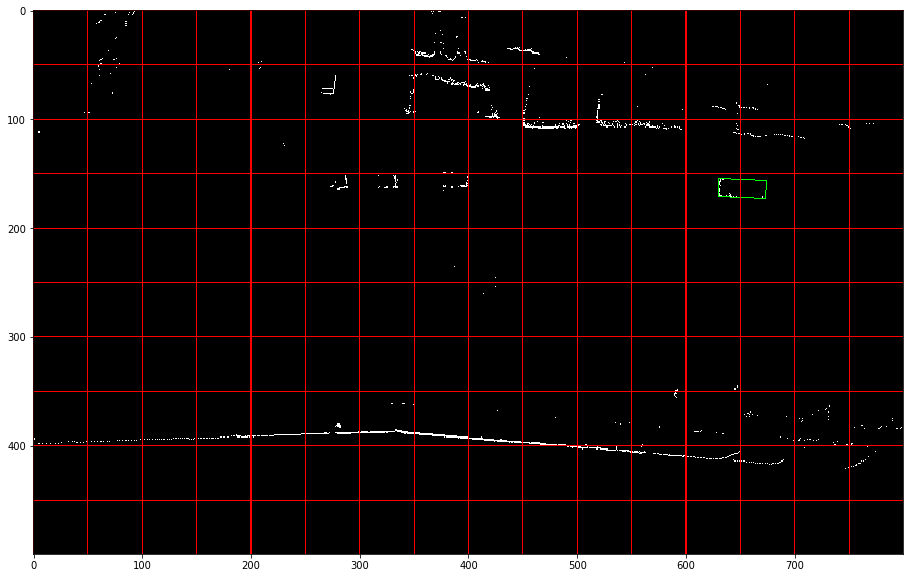

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

prefix = '2011_09_26_drive_0001' 
frame_nr = 0
layer_nr = 4
name = './'+ 'rosws/train_data/'+ prefix + '_'+  str(frame_nr) + '_'+ str(layer_nr) + '.png'
image = cv2.imread(name)
image.shape

df_frame_car = df[ ( (df.frame_nr == frame_nr) & (df.object == 'Car') & (df.tx < 30) ) ]

for index, row in df_frame_car.iterrows():
        # print (row.frame_nr, row.object)
        ( fl , fr, rr, rl) = compute_bb_pixel_coordinate( row.tx, row.ty, row.rz, row.width, row.length) 
        vetexes = np.array([fl , fr, rr, rl ],np.int32)
        cv2.polylines(image, np.int32([vetexes]), True, (0,255,0), 1)
        #cv2.rectangle(image, fl ,rr,(0,255,0),2)

plt.figure(1, figsize=(50,10))

vlines = np.arange(0,500,50)
hlines = np.arange(0,800,50)

for v_pos in vlines:   
    cv2.line(image, (0, v_pos), (800, v_pos), (255,0,0))
for h_pos in hlines:   
    cv2.line(image, (h_pos, 0), (h_pos, 500), (255,0,0))
plt.imshow(image)
# cv2.imwrite('test.png', image)

 

In [10]:
vlines = np.arange(100,500,100)
hlines = np.arange(100,800,100)

In [11]:
hlines = np.arange(0,800,50)


In [12]:
df_frame_car

,frame_nr,object,tx,ty,tz,rz,height,width,length
0,0,Car,25.212516,8.603392,-1.792157,-3.1842,2.167235,1.705712,4.329356


In [13]:
# global parameter 
grid_resolution = 50 #pixel 
image_width = 800  #pixel
image_height = 500 #pixel
h_grid_nr = int (image_width / grid_resolution)
v_grid_nr = int (image_height / grid_resolution)

# s: condidence, tx, ty , rz, width, length
print('label shape {0:2d} x {1:2d} x 6'.format(h_grid_nr,v_grid_nr ))
label = np.zeros([h_grid_nr, v_grid_nr , 6])

label shape 16 x 10 x 6


In [14]:
def create_training_label(df_car):
    label =  np.zeros([h_grid_nr, v_grid_nr , 6])
    for index, row in df_car.iterrows():
        # print (row.frame_nr, row.object)
        #( fl , fr, rr, rl) = compute_bb_pixel_coordinate( row.tx, row.ty, row.rz, row.width, row.length) 
        car_center_pixel = metric2pixel( row.tx, row.ty)
        # only consider pixel in image range
        if car_center_pixel[0] < image_width and car_center_pixel[1] < image_height:       
            # print (car_center_pixel)
            x = int(np.ceil( car_center_pixel[0] / grid_resolution ) - 1 )
            y = int(np.ceil( car_center_pixel[1] / grid_resolution ) - 1 )
            # x y is the position of grid
            # set confidence
            label[x][y][0] = 1.0
            # set normalized tx 
            label[x][y][1] = car_center_pixel[0] / grid_resolution - x 
            label[x][y][2] = car_center_pixel[1] / grid_resolution - y 
            label[x][y][3] = (row.rz + np.pi) / (2 * np.pi)
            label[x][y][4] = row.width / 5
            label[x][y][5] = row.length / 5
            # print(x,y)
            # print (label[x][y])
    return label
            

In [15]:
y_train = create_training_label(df_frame_car)
print (y_train.shape)
 

(16, 10, 6)


In [46]:
# training number 
train_nr = 100
layer_nr = 10
train = np.zeros( [train_nr, image_height, image_width, layer_nr])
# fill in training data
for frame_nr in range (train_nr):
    for i in range(layer_nr):
        name = './'+ 'rosws/train_data/'+ prefix + '_'+  str(frame_nr) + '_'+ str(i) + '.png'
        image = cv2.imread(name)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # crop all the left part
        gray_image[0:int(image_height), 0:int(image_width/2)] = gray_image[0:int(image_height), 0:int(image_width/2)] * 0.0
        gray_image = gray_image/255.0
        train[frame_nr,:,:,i] =  gray_image



In [47]:
y_label = np.zeros([train_nr,960])

for frame_nr in range(train_nr):
    df_frame_car = df[ ( (df.frame_nr == frame_nr) & (df.object == 'Car') & (df.tx < 30)) ]
    y_train = create_training_label(df_frame_car)
    y_label[frame_nr] = y_train.flatten()


In [48]:
print (train.shape)
print (y_label.shape)


(100, 500, 800, 10)
(100, 960)


In [49]:
from keras import backend as K

lamda1 = 1.0
lamda2 = 5.0
mask1 = np.zeros( [h_grid_nr, v_grid_nr , 6] )
for i in range(h_grid_nr):
        for j in range(v_grid_nr):
            mask1[i,j,:] = [1.0,0.0,0.0,0.0,0.0,0.0]
weight1 = lamda1 * mask1.flatten()

mask2 = np.zeros( [h_grid_nr, v_grid_nr , 6] )
mask2_f = mask2.flatten()
mask3 = np.zeros( [h_grid_nr, v_grid_nr , 6] )
for i in range(h_grid_nr):
        for j in range(v_grid_nr):
            mask3[i,j,:] = [0.0,1.0,1.0,1.0,1.0,1.0]
mask3_f = mask3.flatten()
mask4 = 0.1 * mask1
mask4_f = mask4.flatten()
def custom_loss(y_true, y_pred):
    # weight_mat = generate_weight_matrix(y_true)
    
    
    # weights 1
    weights1_f =  weight1 * y_true
    
    # weights 2
    y_true_mask2 = K.cast(K.not_equal(y_true, mask2_f), 'float32')   
    
    weights2_f = y_true_mask2 * mask3_f * lamda2
   
    loss = K.sum((y_true - y_pred) * (y_true - y_pred) * (weights1_f + weights2_f ))
        
    return  loss

def custom_loss_inspect(y_true, y_pred):
    # weight_mat = generate_weight_matrix(y_true)
    
    
    # weights 1
    weights1_f =  weight1 * y_true
    
    # weights 2
    y_true_mask2 = K.cast(K.not_equal(y_true, mask2_f), 'float32')   
    
    weights2_f = y_true_mask2 * mask3_f * lamda2
   
    loss = K.sum((y_true - y_pred) * (y_true - y_pred) * (weights1_f + weights2_f  ))
    # print(type(y_true))
        
    return  (loss, weights1_f + weights2_f )

In [51]:
# define network architecture 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense , Lambda, MaxPooling2D, Dropout,Cropping2D
from keras.optimizers import Adam

model = Sequential()
# conv_net
model.add(Conv2D( 24, 5, 5, input_shape=(500, 800, 10), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D( 36, 5, 5,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D( 48, 5, 5,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096))
model.add(Dropout(0.5))
model.add(Dense(960))
adam = Adam(lr=1e-5)
model.compile(optimizer=adam, loss=custom_loss)
model.summary()
model.fit(train, y_label, batch_size=1 ,nb_epoch= 100,  validation_split=0.2, verbose=1)
# model.fit_generator(train_generator, samples_per_epoch= 3 * len(train_samples), validation_data=validation_generator, nb_val_samples=3 * len(validation_samples), nb_epoch=5)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_19 (Convolution2D) (None, 496, 796, 24)  6024        convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 248, 398, 24)  0           convolution2d_19[0][0]           
____________________________________________________________________________________________________
convolution2d_20 (Convolution2D) (None, 244, 394, 36)  21636       maxpooling2d_19[0][0]            
____________________________________________________________________________________________________
maxpooling2d_20 (MaxPooling2D)   (None, 122, 197, 36)  0           convolution2d_20[0][0]           
___________________________________________________________________________________________

KeyboardInterrupt: 

In [ ]:
model.fit(train, y_label, batch_size=1 ,nb_epoch= 5,  validation_split=0.2, shuffle=True, verbose=1)
model.save('model.h5')

Train on 80 samples, validate on 20 samples
Epoch 1/5
80/80 [==============================] - 15s - loss: 0.4252 - val_loss: 4.6575
Epoch 2/5
80/80 [==============================] - 15s - loss: 0.4058 - val_loss: 4.6894
Epoch 3/5
80/80 [==============================] - 15s - loss: 0.4306 - val_loss: 4.6579
Epoch 4/5
10/80 [==>...........................] - ETA: 13s - loss: 0.2501

In [54]:
y_train.shape

(16, 10, 6)

In [62]:
# prediction frame id 
frame_id_max = train_nr
#result = model.predict()
# print (result.shape)


# (loss, weights_f) = custom_loss_inspect(y_train.flatten(), result.flatten())
# weights_f_reshape = K.reshape(weights_f, [16,10,6])

num_total = 0
num_correct = 0

for frame_id in range(frame_id_max):
    print ('frame ', frame_id)
    #reshaped_result = result[frame_id].reshape( [16,10,6])
    train_predict  = train[frame_id].reshape([1, 500, 800, layer_nr])
    reshaped_result = model.predict(train_predict)
    
    #print (result.shape)
    reshaped_result = reshaped_result.reshape( [16,10,6])
    
    y = y_label[frame_id]
    y = y.reshape([16,10,6])
    
    for i in range(16):
        for j in range (10):
            #print (reshaped_result[i,j,0])
            if reshaped_result[i,j,0] > 0.8 and y[i,j,0]  == 1.0 :
                print ('correct')
                print (reshaped_result[i,j,:])
                print (y[i,j,:])
                num_correct +=1
            if  y[i,j,0] == 1.0  :
                # print (K.eval(weights_f_reshape[i,j,:]))
                # print (K.eval(weights2_f_reshape[i,j,:]))
                
                num_total +=1
            
                

print ('correct/total', num_correct, num_total,  num_correct/num_total)
    

#reshaped_result = result[0].reshape( [16,10,6])

frame  0
correct
[ 0.94761723  0.20887978  0.23509204  0.19262737  0.34346455  0.84244347]
[ 1.          0.04        0.26       -0.00678119  0.34114236  0.86587124]
frame  1
correct
[ 0.95996302  0.65614986  0.2590138   0.00592219  0.32339942  0.85933685]
[ 1.          0.76        0.26       -0.00678119  0.34114236  0.86587124]
frame  2
correct
[ 0.96829855  0.50152647  0.25337601 -0.05658418  0.32318044  0.85086185]
[ 1.          0.48        0.26       -0.00678119  0.34114236  0.86587124]
frame  3
correct
[ 1.01410532  0.30763578  0.25014022  0.00418874  0.3126792   0.87714589]
[ 1.          0.22        0.24       -0.00653369  0.34114236  0.86587124]
correct
[ 0.99908048  0.77105081  0.29977149  0.87472373  0.34520951  0.81791198]
[ 1.          0.9         0.36        0.98990485  0.32030082  0.82258472]
frame  4
correct
[ 0.98370469  0.9412908   0.22387326  0.01866606  0.35120094  0.87446493]
[ 1.          0.94        0.24       -0.0062862   0.34114236  0.86587124]
correct
[ 1.0043605

In [31]:
print (result)

[[  9.29504260e-03   2.49122344e-02  -3.49991675e-03   6.59077521e-03
   -7.02508464e-02   4.06458713e-02   1.66735006e-03  -2.87001710e-02
    1.85473356e-02  -4.69572470e-03  -1.45678613e-02   4.60414588e-02
   -3.97733320e-03   4.05544937e-02   3.23422477e-02  -8.35191458e-02
    2.88968459e-02  -5.37227727e-02  -3.56925763e-02   1.61805842e-02
   -6.35598525e-02   5.69361448e-02   6.50905352e-03   5.96241280e-02
    1.10471696e-02  -3.06652673e-02  -7.00558871e-02  -1.57136954e-02
    7.05642626e-03  -2.32017860e-02  -4.24322933e-02  -3.25721689e-02
   -1.36934668e-01  -8.18866640e-02   3.38521376e-02   1.91485770e-02
    3.16763483e-02   4.57506031e-02  -3.82914208e-02  -2.29014717e-02
    2.33450904e-02   7.46677592e-02  -2.42747292e-02  -4.22301441e-02
    2.02394091e-04  -2.96638161e-02   4.69305664e-02  -2.57713702e-02
   -3.81469652e-02   2.16919556e-03   2.56928448e-02  -2.80849263e-03
    4.75008488e-02   1.55522861e-03   1.05267242e-02   1.35725196e-02
   -1.73626281e-02  

In [39]:
for i in range(16):
    for j in range (10):
        if reshaped_result[i,j,0] > 0.5:
            print (reshaped_result[i,j,:])



[ 1.00000203  0.48000115  0.18000014  0.99598026  0.32030219  0.82258618]
[ 1.00000107  0.34000143  0.19999945  0.99536276  0.32553706  0.82208651]
[ 1.00000203  0.6800034   0.25999936  0.99363279  0.32112539  0.7662462 ]
[ 1.00000107  0.70000148  0.2999993   0.98939919  0.28921759  0.67983443]
[ 1.00000167  0.6800015   0.33999923  0.99277359  0.3427465   0.86295682]


In [40]:
for i in range(16):
    for j in range (10):
        if y_train[i,j,0] > 0.5:
            print (y_train[i,j,:])


[ 1.          0.48        0.18        0.99594966  0.32030082  0.82258472]
[ 1.          0.34        0.2         0.99544527  0.32553582  0.82208442]
[ 1.          0.68        0.26        0.99362957  0.32112522  0.76624442]
[ 1.          0.7         0.3         0.989383    0.28921814  0.67982268]
[ 1.          0.68        0.34        0.99283163  0.34274554  0.86295442]
